# cv cassifiacation task


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
class CNN(nn.Module):
    def __init__(self, num_classes=100):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 100)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [5]:
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [6]:
train_dataset = ImageFolder(root='E:/archive/train', transform=transform)
test_dataset = ImageFolder(root='E:/archive/test', transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [7]:
model = CNN(num_classes=len(train_dataset.classes)).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [8]:
def train(model, train_loader, criterion, optimizer, epochs=5):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in tqdm(train_loader):
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        avg_loss = running_loss / len(train_loader)
        train_losses.append(avg_loss)
        print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}")

In [9]:
def test(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    test_accuracies.append(accuracy)
    print(f'Accuracy of the model on the test images: {accuracy:.2f}%')

In [11]:
train_losses = []  
test_accuracies = []  
epochs = 8
for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")
    train(model, train_loader, criterion, optimizer, epochs=1)
    test(model, test_loader)
    

Epoch 1/8


100%|██████████| 394/394 [00:40<00:00,  9.83it/s]


Epoch 1, Loss: 1.9409
Accuracy of the model on the test images: 57.80%
Epoch 2/8


100%|██████████| 394/394 [00:37<00:00, 10.61it/s]


Epoch 1, Loss: 1.3854
Accuracy of the model on the test images: 66.60%
Epoch 3/8


100%|██████████| 394/394 [00:35<00:00, 11.22it/s]


Epoch 1, Loss: 1.0225
Accuracy of the model on the test images: 67.80%
Epoch 4/8


100%|██████████| 394/394 [00:32<00:00, 12.29it/s]


Epoch 1, Loss: 0.7121
Accuracy of the model on the test images: 70.00%
Epoch 5/8


100%|██████████| 394/394 [00:32<00:00, 12.20it/s]


Epoch 1, Loss: 0.4597
Accuracy of the model on the test images: 70.20%
Epoch 6/8


100%|██████████| 394/394 [00:34<00:00, 11.48it/s]


Epoch 1, Loss: 0.2739
Accuracy of the model on the test images: 71.20%
Epoch 7/8


100%|██████████| 394/394 [00:37<00:00, 10.49it/s]


Epoch 1, Loss: 0.1821
Accuracy of the model on the test images: 73.80%
Epoch 8/8


100%|██████████| 394/394 [00:36<00:00, 10.76it/s]


Epoch 1, Loss: 0.1095
Accuracy of the model on the test images: 72.40%


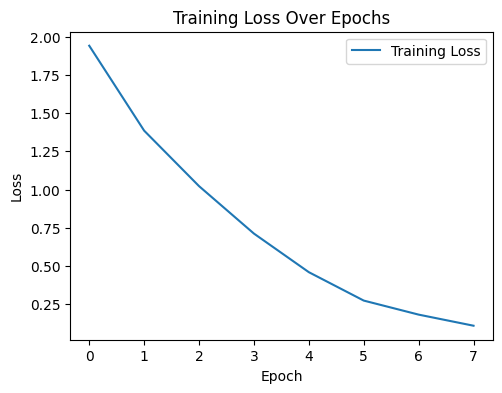

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()


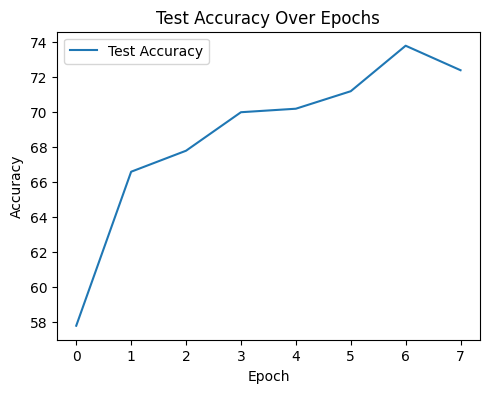

In [20]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Test Accuracy Over Epochs')
plt.legend()
plt.show()

# Object Detection Task 



In [4]:
pip install ultralytics


Note: you may need to restart the kernel to use updated packages.


In [1]:
from ultralytics import YOLO
model = YOLO("yolov8n.pt")
import ultralytics
from IPython.display import display, Image
import cv2
import sys
import numpy as np
import matplotlib.pyplot as plt


In [14]:
results = model("C:/Users/MGM/Downloads/IMG-20241118-WA0117.jpg", show=True)


image 1/1 C:\Users\MGM\Downloads\IMG-20241118-WA0117.jpg: 640x480 1 person, 86.4ms
Speed: 3.8ms preprocess, 86.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


In [16]:
bbox = results[0].boxes.xyxy[0]   
class_id = results[0].boxes.cls[0]  
score = results[0].boxes.conf[0] 
class_name = model.names[int(class_id)]

In [11]:
def show_box(box, ax, class_name, score):
    x0, y0 = box[0], box[1]  # 
    w, h = box[2] - box[0], box[3] - box[1]  
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0, 0, 0, 0), lw=2))  
    ax.text(x0, y0 - 10, f'{class_name} ({score:.2f})', color='green', fontsize=12, fontweight='bold')


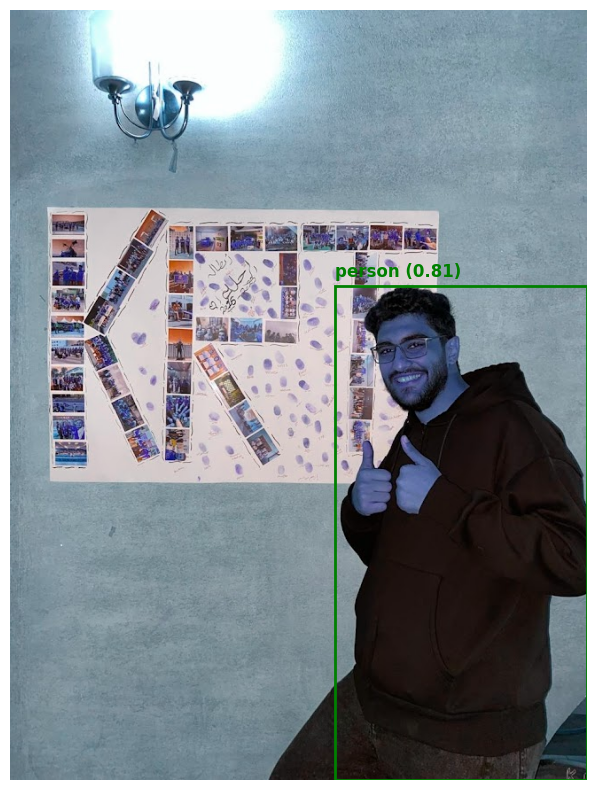

In [18]:
plt.figure(figsize=(10, 10))
plt.imshow(results[0].orig_img)
show_box(bbox, plt.gca(), class_name, score)  
plt.axis('off')
plt.show()